# Домашнее задание №1. SQL

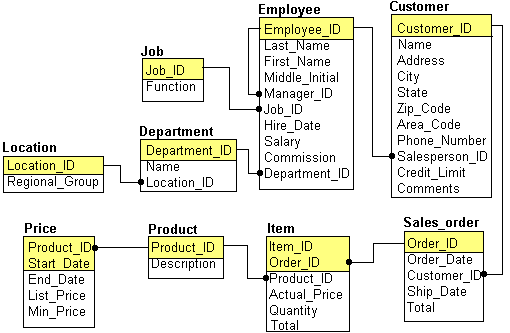



**Первые 20 заданий необходимо выполнять без использования соединений таблиц, в оставшихся 20 соединения таблиц и подзапросы допускаются**

In [ ]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import psycopg2
import pandas as pd

DB_HOST = 'de-edu-db.chronosavant.ru'
DB_USER = 'da11'
DB_USER_PASSWORD = 'gandalfthegrey'
DB_NAME = 'edu'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

**Пример запроса (не забывайте указывать da. перед названием таблицы):**

In [ ]:
pd.read_sql_query("select * from da.customer limit 5", conn)

,customer_id,name,address,city,state,zip_code,area_code,phone_number,salesperson_id,credit_limit,comments
0,100,JOCKSPORTS,345 VIEWRIDGE,BELMONT,CA,96711,415,5986609,7844,5000.0,Very friendly people to work with -- sales rep...
1,101,TKB SPORT SHOP,490 BOLI RD.,REDWOOD CITY,CA,94061,415,3681223,7521,10000.0,Rep called 5/8 about change in order - contact...
2,102,VOLLYRITE,9722 HAMILTON,BURLINGAME,CA,95133,415,6443341,7654,7000.0,Company doing heavy promotion beginning 10/89....
3,103,JUST TENNIS,HILLVIEW MALL,BURLINGAME,CA,97544,415,6779312,7521,3000.0,Contact rep about new line of tennis rackets.
4,104,EVERY MOUNTAIN,574 SURRY RD.,CUPERTINO,CA,93301,408,9962323,7499,10000.0,Customer with high market share (23%) due to a...


### Задание 1
Выбрать коды всех городов, в которых расположены отделы фирмы.

In [ ]:
pd.read_sql_query("""
SELECT 
      regional_group, ---добавил строчку, чтобы выходная информация была бы понятна, в данном случае также можно было бы выбрать сразу всю таблицу SELECT *
      location_id 
FROM 
      da.location 
""", conn)

,regional_group,location_id
0,NEW YORK,122
1,DALLAS,124
2,CHICAGO,123
3,BOSTON,167


### Задание 2
Для каждого сотрудника определить, какой процент по отношению к зарплате составляют его комиссионные.

In [ ]:
pd.read_sql_query("""
SELECT 
      last_name,
      first_name,
      CASE WHEN ROUND((commission/Salary)*100, 2) IS NOT null 
      THEN CAST (ROUND((commission/Salary)*100, 2) AS varchar) 
      ELSE 'no_information'
      END as persent_comission
      
/*      last_name,
      first_name,
      ROUND((commission/Salary)*100, 2) as persent_comission 
      ---вариант без CASE c null
*/
FROM 
      da.Employee
ORDER BY
      persent_comission
""", conn)

,last_name,first_name,persent_comission
0,TURNER,MARY,0.00
1,MARTIN,KENNETH,112.00
2,ALLEN,KEVIN,18.75
3,PETERS,DANIEL,24.00
4,LANGE,GREGORY,24.00
5,WARD,CYNTHIA,40.00
6,ROSS,PAUL,61.54
7,WEST,LIVIA,66.67
8,PORTER,RAYMOND,72.00
9,SHAW,KAREN,96.00


### Задание 3
Вывести два инициала (с точками) и фамилии всех сотрудников

In [ ]:
pd.read_sql_query("""
SELECT 
      CONCAT(SUBSTR(first_name, 1, 1), COALESCE('.'||SUBSTR(middle_initial,1,1),''),'.',last_name) AS FIO  ---Запись также предусматривает случай, когда нет отчества 
FROM 
      da.Employee
""", conn)

,fio
0,J.Q.SMITH
1,K.J.ALLEN
2,J.K.DOYLE
3,L.S.DENNIS
4,L.D.BAKER
5,C.D.WARD
6,D.T.PETERS
7,K.P.SHAW
8,S.S.DUNCAN
9,G.J.LANGE


### Задание 4
По каждой сделке вывести точную сумму сделки, сумму сделки, округленную в большую сторону, округленную в меньшую сторону, округленную по общепринятым правилами округления.

In [ ]:
pd.read_sql_query("""
SELECT 
      order_id,
      total,
      CEIL(total) as total_ceil,
      FLOOR(total) as total_floor,
      ROUND(total) as total_norm
FROM 
      da.Sales_order
""", conn)

,order_id,total,total_ceil,total_floor,total_norm
0,610,101.4,102.0,101.0,101.0
1,611,45.0,45.0,45.0,45.0
2,612,5860.0,5860.0,5860.0,5860.0
3,601,60.8,61.0,60.0,61.0
4,602,56.0,56.0,56.0,56.0
...,...,...,...,...,...
95,530,3026.5,3027.0,3026.0,3027.0
96,545,475.0,475.0,475.0,475.0
97,557,2461.8,2462.0,2461.0,2462.0
98,546,3663.0,3663.0,3663.0,3663.0


### Задание 5
Выбрать фамилии всех сотрудников, у которых комиссионные больше зарплаты.

In [ ]:
pd.read_sql_query("""
SELECT 
      last_name      
FROM 
      da.Employee
WHERE 
      commission > salary
""", conn)

,last_name
0,MARTIN


### Задание 6
Выбрать фамилии всех сотрудников, фамилии которых начинаются на букву 'S'.

In [ ]:
pd.read_sql_query("""
SELECT 
      last_name      
FROM 
      da.Employee
WHERE 
      UPPER(last_name) LIKE 'S%'
""", conn)

,last_name
0,SMITH
1,SHAW
2,SOMMERS
3,SCOTT


### Задание 7
Выбрать имена всех сотрудников, которые не являются менеджерами (job_id=671) и не работают в отделе SALES в NEW YORK (department_id=13).

In [ ]:
pd.read_sql_query("""
SELECT 
      first_name
FROM 
      da.Employee
WHERE 
      job_id != 671 AND 
      department_id != 13
""", conn)

,first_name
0,JOHN
1,KEVIN
2,CYNTHIA
3,SARAH
4,GREGORY
5,RICHARD
6,KENNETH
7,DENISE
8,DONALD
9,LIVIA


### Задание 8
Выбрать фамилии всех сотрудников, у которых код должности 670 или 677 (CLERK или SALESPERSON).

In [ ]:
pd.read_sql_query("""
SELECT 
      last_name
FROM 
      da.Employee
WHERE 
      job_id in (670, 677)
""", conn)

,last_name
0,ALLEN
1,WARD
2,PETERS
3,SHAW
4,DUNCAN
5,LANGE
6,PORTER
7,MARTIN
8,WEST
9,ROSS


Второй вариант решения: где job_id = 667, что соответсвтует job_id должности CLERK

In [ ]:
pd.read_sql_query("""
SELECT 
      last_name
FROM 
      da.Employee
WHERE 
      job_id in (670, 667)
""", conn)

,last_name
0,SMITH
1,ALLEN
2,WARD
3,PETERS
4,SHAW
5,DUNCAN
6,LANGE
7,PORTER
8,MARTIN
9,WEST


### Задание 9
Выбрать всех сотрудников, имена которых состоят из 6 букв и начинаются на 'MAR'.

In [ ]:
pd.read_sql_query("""
SELECT 
      first_name
FROM 
      da.Employee
WHERE 
      LENGTH(REPLACE(first_name, ' ', '')) = 6 AND
      first_name LIKE 'MAR%'
""", conn)

,first_name
0,MARION


### Задание 10
Выбрать фамилии всех сотрудников, которые поступили на работу после 15 апреля 1985 года.

In [ ]:
pd.read_sql_query("""
SELECT 
      last_name
FROM 
      da.Employee
WHERE
      hire_date > '1985-04-15'
""", conn)

,last_name
0,DENNIS
1,BAKER
2,DUNCAN
3,LANGE
4,LEWIS
5,MARTIN
6,SOMMERS
7,BLAKE
8,CLARK
9,SCOTT


### Задание 11
Выбрать фамилии всех сотрудников, которые поступили на работу в 1985 году.

In [ ]:
pd.read_sql_query("""
SELECT 
      last_name
FROM 
      da.Employee
WHERE
      EXTRACT(YEAR FROM hire_date) = 1985
""", conn)

,last_name
0,ALLEN
1,DOYLE
2,DENNIS
3,BAKER
4,WARD
5,PETERS
6,SHAW
7,DUNCAN
8,LANGE
9,JONES


### Задание 12
Для каждого сотрудника выбрать количество полных лет работы в фирме.

In [ ]:
pd.read_sql_query("""
SELECT 
      employee_id,
      last_name,
      first_name,
      middle_initial,
      TO_CHAR(AGE(hire_date), 'YY "years"') AS Experience
FROM 
      da.Employee

""", conn)

,employee_id,last_name,first_name,middle_initial,experience
0,7369,SMITH,JOHN,Q,37 years
1,7499,ALLEN,KEVIN,J,37 years
2,7505,DOYLE,JEAN,K,37 years
3,7506,DENNIS,LYNN,S,37 years
4,7507,BAKER,LESLIE,D,37 years
5,7521,WARD,CYNTHIA,D,37 years
6,7555,PETERS,DANIEL,T,37 years
7,7557,SHAW,KAREN,P,37 years
8,7560,DUNCAN,SARAH,S,37 years
9,7564,LANGE,GREGORY,J,37 years


### Задание 13
Выбрать количество сотрудников, получающих комиссионные. Если сотрудник получает 0 комиссионных, то это тоже считается. Не считаются только NULL.

In [ ]:
pd.read_sql_query("""
SELECT 
      count(last_name) as count_customer_with_comis
FROM 
      da.Employee
WHERE Commission is not null
""", conn)

,count_customer_with_comis
0,10


### Задание 14
Выбрать количество и общую сумму сделок, совершенных с покупателем, код которого - 104.

In [ ]:
pd.read_sql_query("""
SELECT
      customer_id,
      count(total) as order_quantity,
      sum(total) as order_amount

FROM
      da.Sales_order
WHERE
      customer_id = 104
GROUP BY
        customer_id
""", conn)

,customer_id,order_quantity,order_amount
0,104,4,7160.8


### Задание 15
Выбрать среднюю зарплату по каждой должности.

In [ ]:
pd.read_sql_query("""
SELECT
      job_id,
      ROUND(AVG(salary), 2) AS salary_avg
FROM
      da.Employee
GROUP BY
      job_id
""", conn)

,job_id,salary_avg
0,667,921.43
1,668,1825.00
2,670,1331.82
3,669,2968.75
4,672,5000.00
5,671,2725.00


### Задание 16
Выбрать среднюю зарплата продавцов (код должности - 670).

In [ ]:
pd.read_sql_query("""
SELECT
      job_id,
      ROUND(AVG(salary), 2) AS salary_avg
FROM
      da.Employee
WHERE
      job_id = 670
GROUP BY
      job_id
""", conn)

,job_id,salary_avg
0,670,1331.82


### Задание 17
 Выбрать средние зарплаты продавцов (код должности - 670) и клерков (код должности - 667).

In [ ]:
pd.read_sql_query("""
SELECT
      job_id,
      ROUND(AVG(salary), 2) AS salary_avg
FROM
      da.Employee
WHERE
      job_id in (670, 667)
GROUP BY
      job_id
""", conn)

,job_id,salary_avg
0,667,921.43
1,670,1331.82


### Задание 18
Выбрать коды продуктов, по которым было совершено меньше 10 продаж (фактов продаж, не кол-во проданных продуктов).



In [ ]:
pd.read_sql_query("""
SELECT
      product_id,
      count(order_id) as order_quantity
FROM
      da.Item
GROUP BY
      product_id
HAVING
      count(order_id) < 10
ORDER BY
      order_quantity
""", conn)

,product_id,order_quantity
0,105125,2
1,104361,3
2,105127,3
3,101863,3
4,101860,4
5,104360,5
6,102130,6
7,100890,6
8,102132,7
9,103121,8


### Задание 19
Выбрать максимальную зарплату продавцов (код должности - 670) по каждому отделу.

In [ ]:
pd.read_sql_query("""
SELECT
      department_id,
      MAX(salary) as max_salary
FROM 
      da.employee
WHERE
      Job_ID = 670
GROUP BY
      department_id

""", conn)

,department_id,max_salary
0,13,1250.0
1,23,1500.0
2,30,1600.0
3,43,1300.0


### Задание 20
Выбрать список сотрудников фирмы в алфавитном порядке.

In [ ]:
pd.read_sql_query("""
SELECT
      last_name,
      first_name,
      middle_initial
FROM 
      da.employee
ORDER BY
      last_name,
      first_name,
      middle_initial
      
""", conn)

,last_name,first_name,middle_initial
0,ADAMS,DIANE,G
1,ALBERTS,CHRIS,L
2,ALLEN,KEVIN,J
3,BAKER,LESLIE,D
4,BLAKE,MARION,S
5,CLARK,CAROL,F
6,DENNIS,LYNN,S
7,DOUGLAS,MICHAEL,A
8,DOYLE,JEAN,K
9,DUNCAN,SARAH,S


### Задание 21
Выбрать всю информацию о каждом отделе и месте его расположения.

In [ ]:
pd.read_sql_query("""
SELECT
      department.department_id,
      name as name_department,
      location.location_id,
      regional_group /*,
      function,
      last_name as last_name_empl,
      first_name as first_name_empl,
      salary,
      commission,
      hire_date      
      ---можно выводить разную степень детализации, в сжатом виде можно не присоединять таблицу Employee и Job*/
FROM
      da.location
INNER JOIN
      da.department
ON
      location.location_id = department.location_id
/*LEFT JOIN
      da.employee
ON
      department.department_id = employee.department_id
LEFT JOIN
      da.job
ON
      employee.job_id = job.job_id */
ORDER BY
      name_department ---, function, salary DESC
""", conn)

,department_id,name_department,location_id,regional_group
0,10,ACCOUNTING,122,NEW YORK
1,24,OPERATIONS,124,DALLAS
2,34,OPERATIONS,123,CHICAGO
3,40,OPERATIONS,167,BOSTON
4,14,OPERATIONS,122,NEW YORK
5,12,RESEARCH,122,NEW YORK
6,20,RESEARCH,124,DALLAS
7,43,SALES,167,BOSTON
8,30,SALES,123,CHICAGO
9,13,SALES,122,NEW YORK


### Задание 22
Выбрать список фамилий сотрудников по городам, где они работают, с указанием для каждого его должности.

In [ ]:
pd.read_sql_query("""
SELECT
      employee.last_name,
      location.regional_group,
      job.function
FROM
      da.employee
  LEFT JOIN
      da.job
  ON
      employee.job_id = job.job_id
  LEFT JOIN
      da.department
  ON
      employee.department_id = department.department_id
  LEFT JOIN
      da.location
  ON
      department.location_id = location.location_id
ORDER BY
      regional_group
""", conn)

,last_name,regional_group,function
0,ROSS,BOSTON,SALESPERSON
1,ALLEN,CHICAGO,SALESPERSON
2,TURNER,CHICAGO,SALESPERSON
3,SOMMERS,CHICAGO,STAFF
4,MARTIN,CHICAGO,SALESPERSON
5,WARD,CHICAGO,SALESPERSON
6,JAMES,CHICAGO,CLERK
7,BLAKE,CHICAGO,MANAGER
8,MURRAY,DALLAS,CLERK
9,DENNIS,DALLAS,MANAGER


### Задание 23
 Выбрать всех покупателей, с которыми работает продавец TURNER.

In [ ]:
pd.read_sql_query("""
SELECT
      name as name_customer,
      last_name as last_name_employee
FROM
      da.customer
  LEFT JOIN 
      da.employee
  ON
      customer.salesperson_id = employee.employee_id

WHERE
      last_name = 'TURNER'
""", conn)

,name_customer,last_name_employee
0,JOCKSPORTS,TURNER
1,K + T SPORTS,TURNER
2,NORTH WOODS HEALTH AND FITNESS SUPPLY CENTER,TURNER


### Задание 24
Выбрать сотрудников, которые не закреплены за конкретным заказчиком.

In [ ]:
pd.read_sql_query("""
SELECT
      last_name as last_name_employee,
      name as name_customer ---вывел для наглядности, данную строчку можно не выводить по условию задания

FROM 
      da.employee
  LEFT JOIN
      da.customer
  ON
     employee.employee_id = customer.salesperson_id
WHERE
      name is null
""", conn)

,last_name_employee,name_customer
0,SMITH,None
1,DOYLE,None
2,DENNIS,None
3,BAKER,None
4,JONES,None
5,ALBERTS,None
6,LEWIS,None
7,SOMMERS,None
8,BLAKE,None
9,CLARK,None


### Задание 25
Выбрать имена продавцов, которые работают более чем с одним покупателем и названия покупателей, которых они обслуживают.

In [ ]:
pd.read_sql_query("""
SELECT
      first_name as first_name_employee,
      name as name_customer
FROM
      (SELECT
            employee_id,
            first_name,
            count(name)
      FROM 
          da.employee
      LEFT JOIN
          da.customer
      ON
        employee.employee_id = customer.salesperson_id
      GROUP BY
          first_name, employee_id
      HAVING
          count(name) > 1) as employee_2  
LEFT JOIN
      da.customer
ON
      employee_2.employee_id = customer.salesperson_id
""", conn)

,first_name_employee,name_customer
0,SARAH,AL AND BOB'S SPORTS
1,SARAH,THE POWER FORWARD
2,GREGORY,"HIT, THROW, AND RUN"
3,GREGORY,AL'S PRO SHOP
4,KEVIN,WOMENS SPORTS
5,KEVIN,EVERY MOUNTAIN
6,PAUL,THE TOUR
7,PAUL,VELO SPORTS
8,PAUL,THE OUTFIELD
9,PAUL,THE ALL AMERICAN


### Задание 26
Выбрать сумму всех продаж, которые обеспечил продавец TURNER.

In [ ]:
pd.read_sql_query("""
SELECT
      last_name as last_name_employee,
      sum(total) as total_all_sales
FROM
      da.Sales_order
  LEFT JOIN
      da.customer
  ON
      Sales_order.customer_id = customer.customer_id
  LEFT JOIN
      da.employee
  ON
      customer.salesperson_id = employee.employee_id
WHERE
      last_name = 'TURNER'
GROUP BY
      last_name
""", conn)

,last_name_employee,total_all_sales
0,TURNER,58055.9


### Задание 27
Выбрать сумму всех продаж товаров, связанных с теннисом, за лето 1990г. Будьте внимательны с выбором total? Ответьте себе на вопрос: нужен total из таблицы item или из таблицы sales_order, почему?

Из таблицы item, так как в заказе(order) могут быть различные позиции: "теннис", "баскетбол" и т.д.

In [ ]:
pd.read_sql_query("""
SELECT 
      sum(Item.total) as sales_amount_tennis

FROM
      da.sales_order

  LEFT JOIN
      da.Item
  ON
      sales_order.order_id = Item.order_id
  LEFT JOIN
      da.product
  ON
      Item.product_id = product.product_id
WHERE
      order_date BETWEEN '1990-06-01' AND '1990-08-31'
AND
      UPPER(description) LIKE '%TENNIS%'
GROUP BY
      UPPER(description) LIKE '%TENNIS%'
""", conn)

,sales_amount_tennis
0,8492.7


### Задание 28
Выбрать имена и зарплаты самого старого и самого молодого сотрудника фирмы. ("Возраст" сотрудника определять по дате его поступления на работу в фирму).

In [ ]:
pd.read_sql_query("""
SELECT
    first_name,
    salary,
    hire_date,
    CASE
      WHEN hire_date = tminmax.max_hdate THEN 'youngest'
      WHEN hire_date = tminmax.min_hdate THEN 'oldest'
      ELSE 'regular'
    END AS employee_desc
FROM da.employee, (SELECT MAX(hire_date) AS max_hdate, MIN(hire_date) AS min_hdate FROM da.employee) as tminmax
WHERE hire_date = tminmax.max_hdate OR hire_date = tminmax.min_hdate
   """, conn)

,first_name,salary,hire_date,employee_desc
0,JOHN,800.0,1984-12-17,oldest
1,JAMES,750.0,1987-01-16,youngest


### Задание 29
Для каждого продавца вывести разность между его зарплатой и средней зарплатой продавцов в фирме (только продавцов, это отдельная должность).

In [ ]:
pd.read_sql_query("""
SELECT 
      last_name,
      first_name,
      function,
      salary,
      ROUND(salary -
                    (SELECT
                          AVG(salary) as avg_salary_salespers
                    FROM
                          da.employee
                    LEFT JOIN
                          da.job
                    ON
                          employee.job_id = job.job_id
                    WHERE 
                          UPPER(function) = 'SALESPERSON'),2) AS dev_salary_avg
FROM 
    da.employee
LEFT JOIN
    da.job
ON
    employee.job_id = job.job_id
WHERE
    UPPER(function) = 'SALESPERSON'
ORDER BY 
    dev_salary_avg DESC
""", conn)

,last_name,first_name,function,salary,dev_salary_avg
0,ALLEN,KEVIN,SALESPERSON,1600.0,268.18
1,TURNER,MARY,SALESPERSON,1500.0,168.18
2,WEST,LIVIA,SALESPERSON,1500.0,168.18
3,ROSS,PAUL,SALESPERSON,1300.0,-31.82
4,DUNCAN,SARAH,SALESPERSON,1250.0,-81.82
5,LANGE,GREGORY,SALESPERSON,1250.0,-81.82
6,PORTER,RAYMOND,SALESPERSON,1250.0,-81.82
7,MARTIN,KENNETH,SALESPERSON,1250.0,-81.82
8,WARD,CYNTHIA,SALESPERSON,1250.0,-81.82
9,SHAW,KAREN,SALESPERSON,1250.0,-81.82


### Задание 30
Вывести имена, средние инициалы и фамилии всех однофамильцев. (Удобно использовать подзапрос)

In [ ]:
pd.read_sql_query("""
SELECT
      first_name,
      middle_initial,
      namesake.last_name
FROM 
      da.employee
INNER JOIN
          (SELECT 
                last_name,
                count(first_name)
          FROM 
                da.employee
          GROUP BY
                last_name
          HAVING
                count(first_name) > 1) as namesake
ON
    employee.last_name = namesake.last_name
ORDER BY 
        last_name
""", conn)

,first_name,middle_initial,last_name


###Задание 31
Для каждого отдела выбрать процент, который составляют сотрудники отдела от общего числа сотрудников фирмы, и процент, который составляет зарплата отдела от общей зарплаты фирмы.

In [ ]:
pd.read_sql_query("""
SELECT 
      department_id,
      name,
      CAST(count_empl AS float) / 
      (SELECT count(employee_id) FROM da.employee) *100 AS percent_empl_depart,
      ROUND((salary_depart / (SELECT sum(salary) FROM da.employee) *100), 2) AS percent_salary_depart
FROM 
      (SELECT 
            department.department_id,
            name,
            count(employee_id) AS count_empl,
            sum(salary) AS salary_depart
      FROM
            da.employee
      LEFT JOIN
            da.department
      ON
            employee.department_id = department.department_id
      GROUP BY
            department.department_id, name
      ORDER BY
            department.department_id) 
      AS count_empl_depart 

/*SELECT department_id, (SELECT name FROM da.department WHERE da.department.department_id=da.employee.department_id),
                      (count(department_id)/(select count(department_id) from da.employee)*100) as percent_dep,
                      (sum(salary)/(select sum(salary) from da.employee)*100) as percent_salary
FROM da.employee GROUP BY department_id*/

""", conn)

,department_id,name,percent_empl_depart,percent_salary_depart
0,10,ACCOUNTING,9.375,14.42
1,12,RESEARCH,12.500,15.94
2,13,SALES,15.625,12.11
3,14,OPERATIONS,3.125,3.62
4,20,RESEARCH,15.625,17.92
5,23,SALES,15.625,12.36
6,24,OPERATIONS,3.125,2.97
7,30,SALES,18.750,15.49
8,34,OPERATIONS,3.125,3.05
9,43,SALES,3.125,2.14


### Задание 32
Выбрать фамилии начальников тех отделов, которые имеют разветвленную структуру (т.е. тех начальников, у прямых подчиненных которых есть свои подчиненные).

Здесь предлагается следовать следующей логике:

Выбрать коды всех сотрудников, которые являются начальниками -> 

Выбрать коды начальников для всех, чьи коды вошли в предыдущую выборку -> 

Выбрать имена всех, чьи коды вошли в предыдущую выборку

In [ ]:
pd.read_sql_query("""
SELECT last_name
FROM da.employee
INNER JOIN
(SELECT DISTINCT(manager_id) as big_boss
FROM 
    (SELECT DISTINCT(manager_id) AS chief
    FROM  da.employee
    WHERE manager_id is not null) as chiefs
LEFT JOIN da.employee
ON employee.employee_id = chiefs.chief) as big_bosses
ON employee.employee_id = big_bosses.big_boss

""", conn)

,last_name
0,JONES
1,ALBERTS
2,KING


Второй вариант через подзапросы:

In [ ]:
pd.read_sql_query("""
SELECT last_name
FROM da.Employee
WHERE employee_id IN 
                    (SELECT DISTINCT manager_id
                    FROM da.Employee
                    WHERE employee_id IN
                                (
                                SELECT DISTINCT manager_id
                                FROM da.Employee
                                WHERE manager_id IS NOT NULL
                                ) AND manager_id IS NOT NULL)            

""", conn)

,last_name
0,JONES
1,ALBERTS
2,KING


### Задание 33
Выбрать названия отдела, заключившего сделки на самую большую сумму, и город, в котором он находится. Здесь удобно применить подзапросы, хотя можно сделать и с помощью соединений таблиц.

In [ ]:
pd.read_sql_query("""
SELECT
      department.department_id,
      department.name as name_department,
      regional_group,
      sum(total) as sum_depart
FROM
    da.sales_order
LEFT JOIN
    da.customer
ON
    sales_order.customer_id = customer.customer_id
LEFT JOIN
    da.employee
ON
    customer.salesperson_id = employee.employee_id
LEFT JOIN
    da.department
ON
    employee.department_id = department.department_id
LEFT JOIN
    da.location
ON
    department.location_id = location.location_id
GROUP BY
      department.department_id, regional_group
ORDER BY
      sum_depart DESC
LIMIT 1

/*SELECT
    d.department_id,
    d.name,
    l.regional_group,
    so.total
FROM da.Sales_order so
    INNER JOIN da.Customer c ON so.customer_id = c.customer_id
    INNER JOIN da.Employee e ON c.salesperson_id = e.employee_id
    INNER JOIN da.Department d ON e.department_id = d.department_id
    INNER JOIN da.Location l ON d.location_id = l.location_id
WHERE so.total = (
                    SELECT MAX(total)
                    FROM da.sales_order
)*/
""", conn)

,department_id,name_department,regional_group,sum_depart
0,30,SALES,CHICAGO,103258.9


### Задание 34
Выбрать название товара, дату продажи, цену продажи для всех случаев, когда товары продавались ниже, чем за 75% их объявленной цены.

**В заданиях подобным этому, не забудьте о том как действует цена в этой базе: она действует от price.start_date до price.end_date, причем если price.end_date IS NULL, то цена действует до сих пор!**

In [ ]:
pd.read_sql_query("""
SELECT
      description,
      order_date,
      actual_price,
      list_price * 0.75 AS list_price_075, ---вывел для удобства анализа и проверки
      list_price ---вывел для удобства анализа и проверки
FROM 
    da.item
LEFT JOIN
    da.Sales_order
ON
    item.order_id = Sales_order.order_id
LEFT JOIN
    da.product
ON
    item.product_id = product.product_id
LEFT JOIN
      da.price
ON
    product.product_id = price.product_id
WHERE 
    order_date BETWEEN start_date AND coalesce(end_date, current_date)
AND 
    actual_price < list_price * 0.75
""", conn)

,description,order_date,actual_price,list_price_075,list_price
0,SB ENERGY BAR-6 PACK,1991-02-02,1.75,1.80,2.4
1,YELLOW JERSEY BICYCLE GLOVES,1990-09-04,10.00,11.25,15.0
2,YELLOW JERSEY BICYCLE GLOVES,1991-03-04,10.00,11.25,15.0


### Задание 35
Выбрать общую сумму скидок, предоставленных покупателю STADIUM SPORTS в 1989г.

**Скидка здесь это list_price*quantity-item.total**

In [ ]:
pd.read_sql_query("""
 SELECT
      name AS name_customer,
      sum(discount) AS sum_discount_1989
FROM
      (SELECT 
            sales_order.customer_id,
            name,
            order_date,
            list_price,
            quantity,
            item.total,
            list_price * quantity - item.total as discount
      FROM da.sales_order
      LEFT JOIN
            da.customer
      ON
            sales_order.customer_id = customer.customer_id
      LEFT JOIN
            da.item
      ON
            sales_order.order_id = item.order_id
      LEFT JOIN
            da.product
      ON
            item.product_id = product.product_id
      LEFT JOIN
            da.price
      ON
            product.product_id = price.product_id
      WHERE 
            name = 'STADIUM SPORTS' AND EXTRACT(YEAR FROM order_date) = 1989
            ) AS SS_1989_discount
GROUP BY
      name
            """, conn)
            

,name_customer,sum_discount_1989
0,STADIUM SPORTS,1519.8


### Задание 36
Выбрать список сотрудников фирмы с указанием фамилии непосредственного начальника каждого. С помощью alias-ов можно соединять таблицы сами с собой

In [ ]:
pd.read_sql_query("""
SELECT 
      subordinate.last_name as subordinate_name,
      subordinate.first_name as subordinate_surname,
      chief.last_name as chief_surname

      
FROM
      da.employee as subordinate
LEFT JOIN
      da.employee as chief
ON
      subordinate.manager_id = chief.employee_id
""", conn)

,subordinate_name,subordinate_surname,chief_surname
0,SMITH,JOHN,FORD
1,ALLEN,KEVIN,BLAKE
2,DOYLE,JEAN,KING
3,DENNIS,LYNN,KING
4,BAKER,LESLIE,KING
5,WARD,CYNTHIA,BLAKE
6,PETERS,DANIEL,DOYLE
7,SHAW,KAREN,DOYLE
8,DUNCAN,SARAH,DENNIS
9,LANGE,GREGORY,DENNIS


### Задание 37
 Для каждого сотрудника вывести разность между его зарплатой и средней зарплатой сотрудников, выполняющих те же функции.

In [ ]:
pd.read_sql_query(""" 
SELECT
      LAST_name,
      first_name,
      function,
      salary, ---вывел для удобства проверки
      ROUND((AVG(salary) OVER (PARTITION BY function ORDER BY function)),2) as avgsalary, ---вывел для удобства проверки
      ROUND((salary - AVG(salary) OVER (PARTITION BY function ORDER BY function)),2) delta_salary_avgsalary
FROM 
      da.employee
LEFT JOIN
      da.job
ON
      employee.job_id = job.job_id

""", conn)

,last_name,first_name,function,salary,avgsalary,delta_salary_avgsalary
0,SCOTT,DONALD,ANALYST,3000.0,2968.75,31.25
1,ROBERTS,GRACE,ANALYST,2875.0,2968.75,-93.75
2,FORD,JENNIFER,ANALYST,3000.0,2968.75,31.25
3,FISHER,MATTHEW,ANALYST,3000.0,2968.75,31.25
4,SMITH,JOHN,CLERK,800.0,921.43,-121.43
5,ADAMS,DIANE,CLERK,1100.0,921.43,178.57
6,JAMES,FRED,CLERK,950.0,921.43,28.57
7,DOUGLAS,MICHAEL,CLERK,800.0,921.43,-121.43
8,MILLER,BARBARA,CLERK,1300.0,921.43,378.57
9,JENSEN,ALICE,CLERK,750.0,921.43,-171.43


### Задание 38
Вывести таблицу распределения объема продаж товара DUNK BASKETBALL INDOOR по годам. (объем продаж в деньгах)



In [ ]:
pd.read_sql_query(""" 
SELECT 
      ---sum(item.total)  
      distinct (TO_CHAR (order_date, 'YYYY')) AS YEAR,
      sum(item.total) OVER (PARTITION BY  EXTRACT(YEAR FROM order_date) 
                            ORDER BY      EXTRACT(YEAR FROM order_date))
                            AS sum_total_product                        
FROM
      da.sales_order
LEFT JOIN
      da.item
ON
      sales_order.order_id = item.order_id
LEFT JOIN
      da.product
ON
      item.product_id = product.product_id
WHERE 
      description = 'DUNK BASKETBALL INDOOR' ---сюда можно подставлять любой интересующий товар

 """, conn)

,year,sum_total_product
0,1989,5830.0
1,1990,5337.3
2,1991,3597.0


### Задание 39
Выбрать фамилии тех сотрудников, у которых суммарный доход (зарплата + комиссионные) больше 2000.

Нужно учесть случай, когда либо зарплата, либо комиссионные IS NULL, поскольку сама по себе зарплата или сами по себе комиссионные могут быть уже больше 2000, а любое число + NULL как мы знаем дает NULL.

In [ ]:
pd.read_sql_query(""" 
SELECT
      last_name,
      salary,
      commission,
      coalesce(salary, 0) + coalesce(commission, 0) AS income
FROM
      da.employee
WHERE
      coalesce(salary, 0) + coalesce(commission, 0) > 2000

""", conn)

,last_name,salary,commission,income
0,DOYLE,2850.0,NaN,2850.0
1,DENNIS,2750.0,NaN,2750.0
2,BAKER,2200.0,NaN,2200.0
3,SHAW,1250.0,1200.0,2450.0
4,JONES,2975.0,NaN,2975.0
5,ALBERTS,3000.0,NaN,3000.0
6,PORTER,1250.0,900.0,2150.0
7,MARTIN,1250.0,1400.0,2650.0
8,BLAKE,2850.0,NaN,2850.0
9,CLARK,2450.0,NaN,2450.0


### Задание 40
Выбрать названия товаров, для которых нынешняя цена увеличилась по сравнению с ценой на 15 декабря 1989г. более, чем на 15%.

Здесь удобно делать задачу по частям

1. Получите цену на 15 декабря 1989г.
2. Получите цену, действующую сейчас
3. Соедините эти два запроса

Сравнивать тут нужно только list_price.

In [ ]:
pd.read_sql_query("""
SELECT
      description,
      list_prise_19891215,
      list_prise_now
FROM 
      da.product
LEFT JOIN           
      (SELECT
            product.product_id,
            list_price as list_prise_19891215
      FROM
            da.price
      LEFT JOIN
            da.product
      ON
            price.product_id = product.product_id 
      WHERE
            '1989-12-15' BETWEEN start_date AND coalesce(end_date, current_date)) 
      AS price_table_19891215
ON
      product.product_id = price_table_19891215.product_id
LEFT JOIN 
      (SELECT
            product_id,
            list_price as list_prise_now,
            start_date,
            coalesce(end_date, current_date) AS end_date
      FROM
            da.price
      WHERE
            current_date BETWEEN start_date AND coalesce(end_date, current_date))
      AS actual_price_table
ON
    price_table_19891215.product_id = actual_price_table.product_id
WHERE
    list_prise_now > list_prise_19891215 + list_prise_now * 0.15
""", conn)

,description,list_prise_19891215,list_prise_now
0,YELLOW JERSEY BICYCLE GLOVES,10.0,15.0
1,YELLOW JERSEY WATER BOTTLE,2.0,3.0
2,YELLOW JERSEY BOTTLE CAGE,5.0,6.0


### Задание 41
Пожелать хорошего дня

In [ ]:
!pip install cowsay

import cowsay
cowsay.cow('Хорошего и продуктивного дня')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  ____________________________
| Хорошего и продуктивного дня |
                            \
                             \
                               ^__^
                               (oo)\_______
                               (__)\       )\/\
                                   ||----w |
                                   ||     ||
